# K-means clustering
* K-means clustering can also be used for outlier
detection. One of the biggest challenges of k-means clustering is identifying
the optimum number of clusters that must be used.

* If a problem is supercomplex and determining the number of clusters is simply not feasible,
the "elbow" method can be used to get some understanding of the potential
number of clusters that will be needed.

* On the other
hand, if your particular domain expertise indicates that less number of clusters
is needed, the domain expertise will supersede the elbow point methodology.
The notion of the elbow point technique is to provide guidance when unsure of
the number of clusters that will be needed, and it is not to provide an exact
solution to a problem.

* Please note that k-means algorithm’s goal is to select centroids that will
lead to minimizing "inertia." Another term used in lieu of "inertia" is "within
cluster sum of squared errors".

* Please note that a lower inertia number is
desired. 0 is optimal; however, in a high-dimensional problem, inertia could be
high. In those problems, applying PCA prior to k-means clustering could
alleviate this problem which is often referred to as "curse of dimensionality".

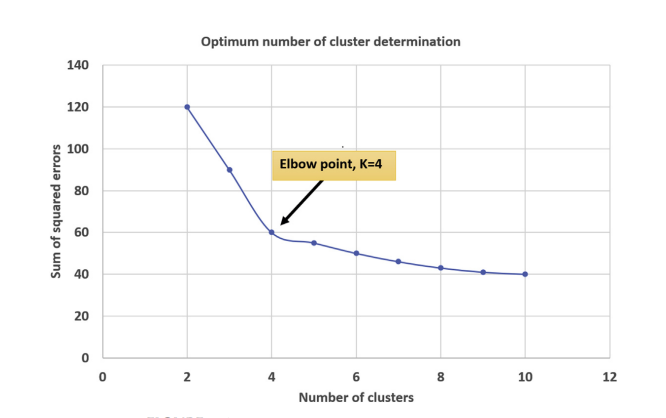

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_excel('Chapter4_Geologic_DataSet.xlsx')
df.describe()

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TOC, fraction","TVD, ft"
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,157.972603,2.242265,22.438356,0.159863,20.283105,0.063221,9935.125571
std,30.396528,0.019978,7.971895,0.037465,3.187825,0.008410,827.981530
min,66.000000,2.209100,5.000000,0.100000,10.000000,0.032000,8046.000000
25%,139.000000,2.226425,17.000000,0.130000,19.000000,0.057000,9372.250000
50%,155.000000,2.239300,22.000000,0.150000,20.000000,0.065000,9844.500000
75%,178.000000,2.255925,26.000000,0.190000,22.000000,0.070000,10440.000000
max,259.000000,2.319600,49.000000,0.310000,33.000000,0.077000,12474.000000


# Step 1

### To visualize the distribution of each parameter, use the code below and change the column name to plot each feature.

C:\Users\Emmanuel Nkrumah\AppData\Local\Temp\ipykernel_13200\2549900481.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GR_API'], label = 'Clustering Data',norm_hist = True,
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GR_API', ylabel='Density'>

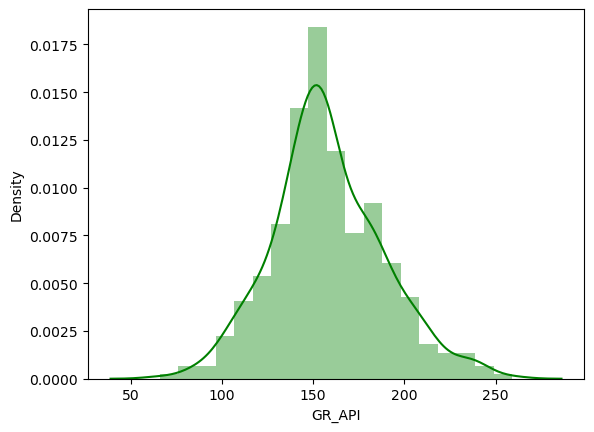

In [2]:
sns.distplot(df['GR_API'], label = 'Clustering Data',norm_hist = True,
            color = 'g')

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


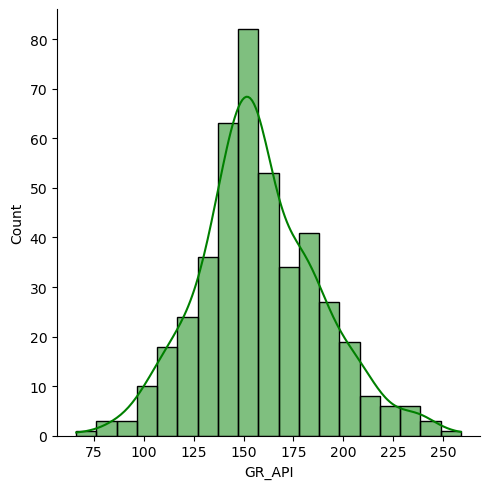

In [3]:
sns.displot(df['GR_API'], label = 'Clustering Data',
            color = 'g', kde = True)

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


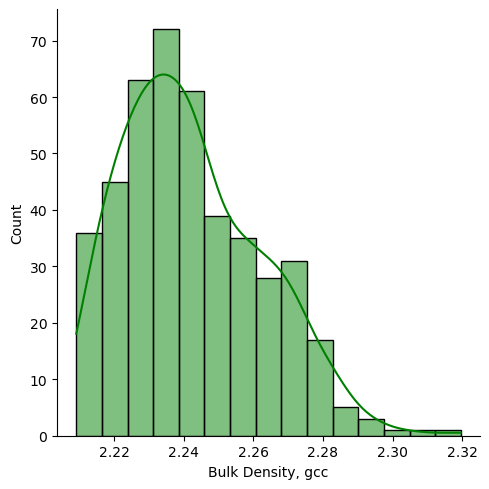

In [4]:
sns.displot(df['Bulk Density, gcc'], label = 'Clustering Data',
            color = 'g', kde = True)

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


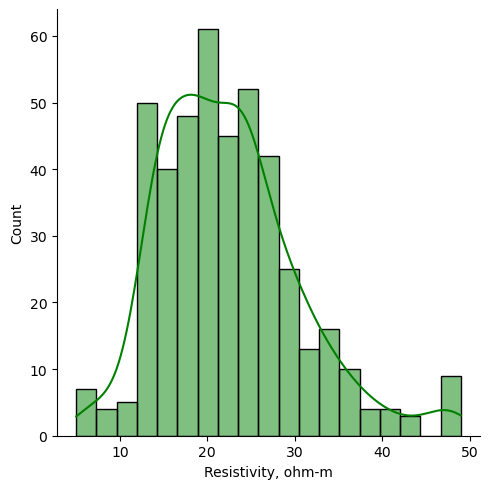

In [5]:
sns.displot(df['Resistivity, ohm-m'], label = 'Clustering Data',
            color = 'g', kde = True)

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


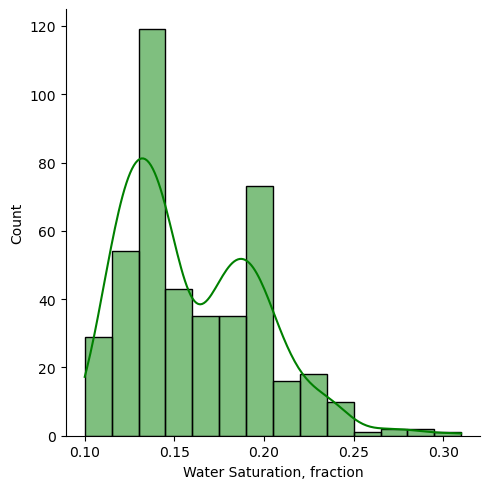

In [6]:
sns.displot(df['Water Saturation, fraction'], label = 'Clustering Data',
            color = 'g', kde = True)

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


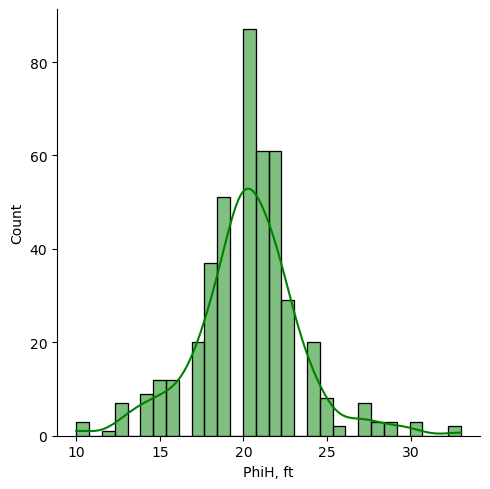

In [7]:
sns.displot(df['PhiH, ft'], label = 'Clustering Data',
            color = 'g', kde = True)

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


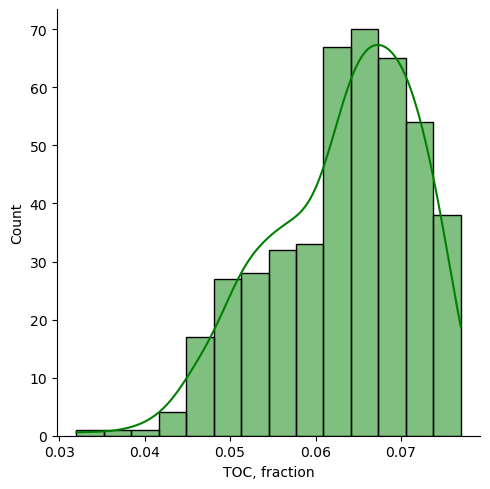

In [8]:
sns.displot(df['TOC, fraction'], label = 'Clustering Data',
            color = 'g', kde = True)

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


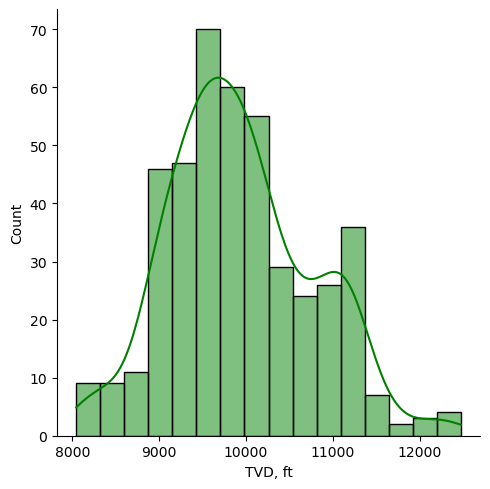

In [9]:
sns.displot(df['TVD, ft'], label = 'Clustering Data',
            color = 'g', kde = True)

## Next, let’s plot a heat map of all parameters versus one another to find potential collinear features.

<Axes: >

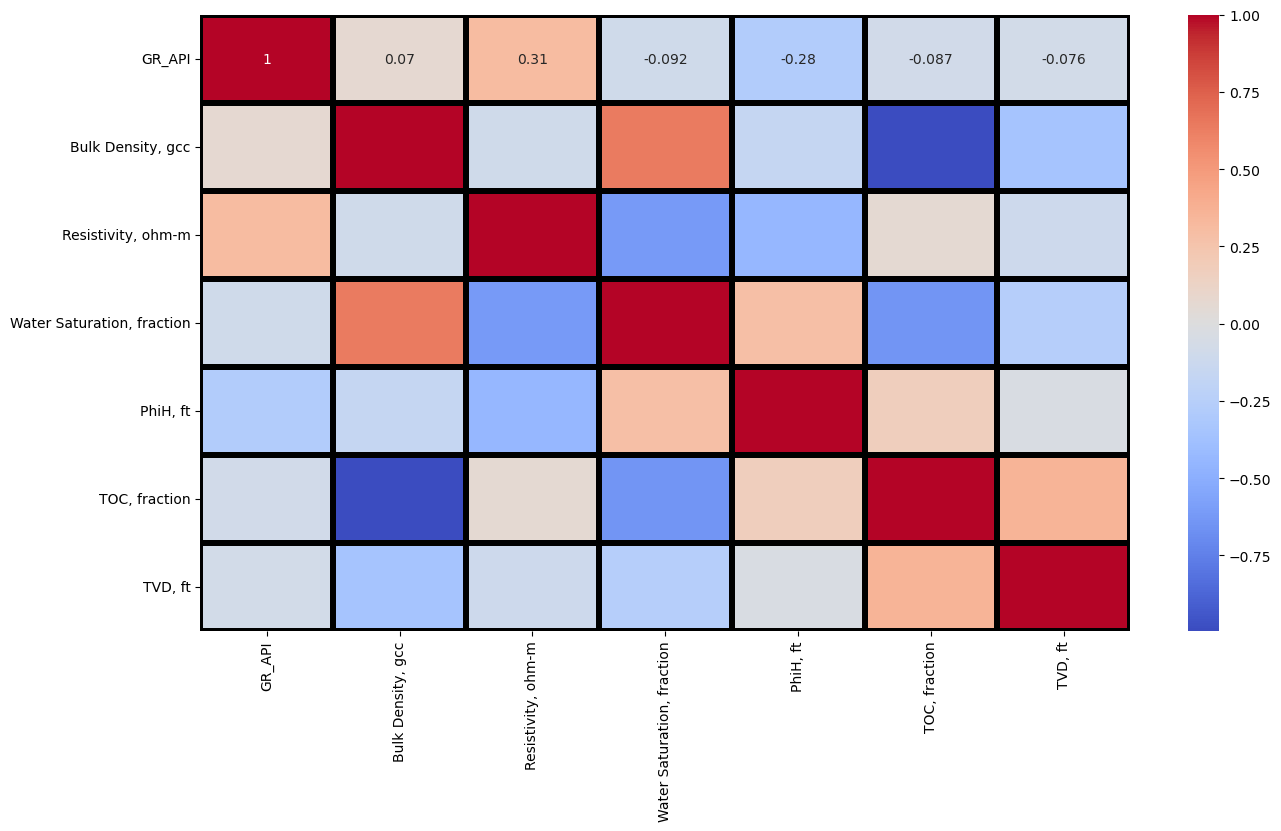

In [10]:
fig = plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True, linewidths = 4,
            linecolor = 'black')

# Step 2

## Next, let’s import the StandardScaler library and standardize the data prior to feeding the data into the k-means algorithm:

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled = scaler.fit(df)

df_scaled = scaler.transform(df)

df_scaled

array([[-1.31654221, -1.63691997,  0.07053355, ...,  0.85324677,
         1.64018978,  0.88856422],
       [ 0.39613573, -1.19092098, -0.18063471, ..., -0.08890975,
         1.16403195, -0.00377924],
       [ 0.26439127, -0.81507913, -1.05972362, ...,  0.22514243,
         0.80691358, -0.22746968],
       ...,
       [-0.03203375,  0.96891686, -0.30621884, ..., -0.7170141 ,
        -0.97867828, -1.12102229],
       [-0.52607547,  0.50287296, -1.05972362, ...,  0.5391946 ,
        -0.50252045,  0.55846969],
       [-0.32845878, -0.45928217, -0.43180297, ...,  1.16729895,
         0.44979521, -0.65913177]])

# Step 3
* Next, let’s import the k-means library and write a for loop for calculating
within cluster sum of squared errors.

* Afterward, let’s use the matplotlib library
to plot number of clusters on the x-axis versus within cluster sum of squared
errors:

Text(0.5, 1.0, 'The Elbow method showing the optimal k')

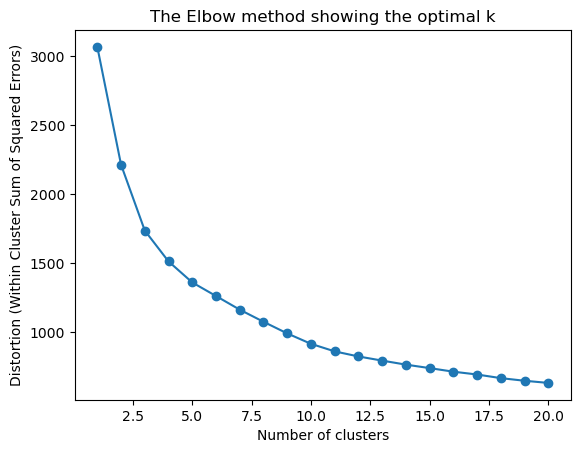

In [13]:
from sklearn.cluster import KMeans

distortions = []

for i in range(1, 21):
    km = KMeans(n_clusters = i, random_state = 1000, init = 'k-means++',
               n_init = 1000, max_iter = 500)
    km.fit(df_scaled)
    distortions.append(km.inertia_)

plt.plot(range(1,21), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion (Within Cluster Sum of Squared Errors)')
plt.title('The Elbow method showing the optimal k')

In [17]:
print(distortions)

[3065.9999999999986, 2212.13915058994, 1734.899365220575, 1511.230456410803, 1358.87999372175, 1260.5264376284276, 1161.6172690989592, 1073.8746367989747, 989.5517968516167, 914.0768836355974, 859.223306467085, 822.4244965458888, 792.3005503771578, 763.1265352503877, 737.9965123809864, 711.9877047812172, 691.5518393867278, 665.2710922435842, 646.2654995106135, 630.5190503644277]


# Code Explanation
* n_clusters represents the number of clusters that is desirable to be chosen
when applying k-means clustering.

* In this example, since the goal is to plot
various number of clusters from 1 to 20, n_clusters was set to "i" and "i" is
defined as a range between 1 and 21.

* The term "init" refers to a method for
initialization that can be set to "random" that will randomly initialize the
centroids.

* A more desirable approach that was used in this example is called
"k-means++" which, according to the scikit library definition, refers to
selecting the initial cluster centers in an intelligent way to speed up convergence.

* Using "k-means++" initializes the centroids to be far from one
another which could potentially lead to better results than random initialization
(Clustering, n.d.).

* "max_iter" refers to the maximum number of iterations for
a single run.

* "random_state" was set to 1000 to have a repeatable approach in
determining the random number generation for centroid initialization.

* In other
words, the outcome of k-means will be the same if run again, since the same
seed number is being used to generate the random number.

* In the for loop above, an instance of k-means clustering class is created with the defined arguments and assigned to variable
"km".

* Afterward, method "km.fit" was called with argument "df_Scaled"
(which is the standardized data).

* Next, the inertia results have been appended
to the empty list called "distortions" that was initially defined.

* The rest of the
code is simply plotting x and y in a line plot. To get a list of inertia numbers,
simply type "print(distortions)".

## The purpose of the elbow technique is to find the number of desired clusters to choose.

* The next step is to assume 10 clusters and proceed with the next phase of
labeling the data set and obtaining the centroids for each cluster.

* In the code
below, the same assumptions (random_state = 1000, init = 'k-means++',
n_init = 1000, max_iter = 500) were used with 10 clusters.

In [15]:
from sklearn.cluster import KMeans
n = 10

kmeans = KMeans(n_clusters = n, random_state = 1000, init = 'k-means++',
               n_init = 1000, max_iter = 500)

kmeans = kmeans.fit(df_scaled)

print(kmeans.cluster_centers_)

[[-2.87618001e-01  5.71827416e-01 -7.88461898e-01  1.06184959e+00
   2.28532469e+00 -5.97752013e-01 -3.45771693e-01]
 [ 9.29212836e-01 -1.04012023e+00  3.65888822e-01 -8.02946343e-01
   2.48405550e-01  1.02294815e+00  5.64179505e-01]
 [-9.91701709e-01 -9.32302480e-01 -2.64357461e-01 -8.13716626e-01
   3.42479674e-02  9.98310353e-01  1.48407629e+00]
 [-8.23159217e-01 -8.52061964e-01  3.16678448e-01 -7.76620277e-01
   3.13077035e-01  8.45006205e-01 -3.58346723e-01]
 [-6.12408009e-01  1.11629242e+00 -5.49775939e-01  9.30831085e-01
  -5.56011840e-02 -1.13018304e+00 -2.26535347e-01]
 [-1.14593614e-01 -1.92016858e-01 -8.05206449e-01  6.48550166e-01
   1.91643527e-01  2.11716294e-01 -3.10787315e-01]
 [ 1.29364484e+00  1.39862938e+00  2.50372608e+00 -8.81503915e-01
  -2.01247931e+00 -1.41019631e+00 -6.03964867e-01]
 [ 8.98019374e-01  2.11243060e+00 -9.93941456e-01  2.17959041e+00
   1.05503503e-01 -2.09538175e+00 -7.14521778e-01]
 [ 1.48302750e+00 -3.85182734e-02  3.30672108e-01 -5.02147720e-0

# Step 4
* The next step is to obtain the labels for each well. Simply call
"kmeans.labels_" as follows:

In [16]:
labels = kmeans.labels_

labels

array([2, 1, 5, 5, 3, 0, 6, 3, 1, 1, 4, 4, 4, 4, 1, 9, 2, 4, 2, 9, 9, 3,
       2, 8, 9, 5, 0, 5, 2, 5, 7, 4, 1, 4, 5, 7, 9, 1, 3, 0, 0, 4, 4, 5,
       9, 0, 8, 9, 2, 4, 9, 9, 3, 3, 3, 1, 2, 3, 1, 4, 5, 3, 2, 0, 5, 1,
       2, 6, 6, 1, 5, 5, 2, 3, 8, 6, 2, 4, 7, 9, 0, 5, 1, 1, 1, 2, 0, 4,
       9, 3, 9, 6, 2, 1, 1, 4, 4, 4, 4, 7, 0, 1, 1, 3, 5, 0, 3, 3, 7, 0,
       0, 8, 3, 3, 3, 9, 2, 8, 1, 9, 5, 4, 5, 1, 5, 9, 5, 9, 9, 1, 3, 9,
       0, 5, 9, 5, 4, 9, 2, 8, 2, 8, 7, 3, 5, 5, 2, 9, 0, 3, 4, 2, 4, 4,
       8, 3, 9, 2, 5, 9, 7, 1, 2, 9, 6, 5, 7, 0, 2, 9, 3, 5, 9, 4, 4, 5,
       2, 3, 2, 1, 2, 3, 7, 9, 4, 0, 0, 4, 5, 5, 4, 5, 2, 3, 5, 7, 4, 8,
       2, 6, 2, 6, 3, 1, 3, 9, 2, 2, 1, 2, 6, 6, 7, 3, 4, 5, 5, 4, 5, 8,
       4, 4, 4, 4, 0, 9, 9, 6, 7, 7, 7, 3, 1, 1, 2, 8, 5, 8, 5, 5, 9, 1,
       9, 6, 9, 7, 5, 5, 4, 5, 2, 8, 6, 9, 1, 1, 4, 5, 5, 4, 5, 5, 5, 5,
       4, 4, 1, 3, 8, 3, 9, 5, 5, 4, 5, 0, 2, 8, 3, 2, 5, 2, 5, 7, 9, 4,
       4, 4, 7, 0, 2, 2, 9, 8, 3, 1, 5, 5, 9, 9, 9,

# Step 5
* Next, let’s convert **"df_scaled"** from an array to a data frame and add the
labeled clusters per well to that data frame as follows:

In [17]:
df_scaled = pd.DataFrame(df_scaled, columns = df.columns[0:7])

df_scaled['clusters'] = labels

df_scaled

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TOC, fraction","TVD, ft",clusters
0,-1.316542,-1.636920,0.070534,-0.797998,0.853247,1.640190,0.888564,2
1,0.396136,-1.190921,-0.180635,0.270880,-0.088910,1.164032,-0.003779,1
2,0.264391,-0.815079,-1.059724,1.072538,0.225142,0.806914,-0.227470,5
3,0.264391,-0.815079,-1.059724,1.072538,0.225142,0.806914,-0.227470,5
4,-0.756628,-0.599596,-0.055051,0.003661,1.167299,0.568835,-0.862267,3
...,...,...,...,...,...,...,...,...
433,-1.151862,-0.579552,0.196118,-0.530778,0.539195,0.568835,-0.399167,3
434,-0.559012,0.878715,-0.306219,1.072538,-0.402962,-0.859639,0.182428,4
435,-0.032034,0.968917,-0.306219,0.270880,-0.717014,-0.978678,-1.121022,4
436,-0.526075,0.502873,-1.059724,1.339758,0.539195,-0.502520,0.558470,4


# Step 6
* Next, let’s return the data to its original (unstandardized form) by multiplying each variable by the standard deviation of that variable and adding the
mean of that variable as illustrated below.

* Note that **"scaler.inverse_transform()"** in scikit-learn could have also been used to transform the data back to
its original form.

In [21]:
df_scaled['GR_API'] = (df_scaled['GR_API'] * (df['GR_API'].std()) + df['GR_API'].mean())

df_scaled['Bulk Density, gcc'] = (df_scaled['Bulk Density, gcc'] * \
            (df['Bulk Density, gcc'].std()) + df['Bulk Density, gcc'].mean())

df_scaled['Resistivity, ohm-m'] = (df_scaled['Resistivity, ohm-m'] *\
            (df['Resistivity, ohm-m'].std()) + df['Resistivity, ohm-m'].mean())

df_scaled['Water Saturation, fraction'] = (df_scaled['Water Saturation, fraction'] *\
                                           (df['Water Saturation, fraction'].std()) + 
           df['Water Saturation, fraction'].mean())

df_scaled['PhiH, ft'] = (df_scaled['PhiH, ft'] * (df['PhiH, ft'].std()) +\
                         df['PhiH, ft'].mean())

df_scaled['TVD, ft'] = (df_scaled['TVD, ft'] * (df['TVD, ft'].std()) +\
                       df['TVD, ft'].mean())

In [24]:
Group_by = df_scaled.groupby(by = 'clusters').mean()
Group_by

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TOC, fraction","TVD, ft"
clusters,,,,,,,
0,4.342019e+06,2.287974,9810.684124,0.166133,365.097754,-0.597752,6.623026e+09
1,5.380805e+06,2.287974,14472.810871,0.166034,299.110905,1.022948,7.139538e+09
2,3.740956e+06,2.287974,11927.407639,0.166034,292.173181,0.998310,7.661695e+09
3,3.884838e+06,2.287974,14274.062781,0.166036,301.205965,0.845006,6.615889e+09
4,4.064752e+06,2.287974,10774.675547,0.166126,289.262480,-1.130183,6.690708e+09
5,4.489727e+06,2.287974,9743.057175,0.166111,297.272076,0.211716,6.642884e+09
6,5.691914e+06,2.287974,23106.987704,0.166030,225.868593,-1.410196,6.476469e+09
7,5.354176e+06,2.287974,8980.804845,0.166191,294.481534,-2.095382,6.413714e+09
8,5.853587e+06,2.287974,14330.579589,0.166050,248.578084,-0.000854,7.343497e+09


In [23]:
df_scaled.columns

Index(['GR_API', 'Bulk Density, gcc', 'Resistivity, ohm-m',
       'Water Saturation, fraction', 'PhiH, ft', 'TOC, fraction', 'TVD, ft',
       'clusters'],
      dtype='object')

In [25]:
df_scaled.groupby(by = 'clusters').count()

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TOC, fraction","TVD, ft"
clusters,,,,,,,
0,25,25,25,25,25,25,25
1,54,54,54,54,54,54,54
2,51,51,51,51,51,51,51
3,50,50,50,50,50,50,50
4,66,66,66,66,66,66,66
5,75,75,75,75,75,75,75
6,16,16,16,16,16,16,16
7,21,21,21,21,21,21,21
8,28,28,28,28,28,28,28


# Silhouette Coefficient

The **Silhouette Coefficient** is a metric used to evaluate the quality of clustering. It measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The value of the Silhouette Coefficient lies between -1 and 1, and can be interpreted as follows:

### Key Points of the Silhouette Coefficient:
1. **Range of Values**: 
   - **+1**: The sample is very well clustered, meaning it is far away from the boundary separating its own cluster and the neighboring clusters.
   - **0**: The sample is on or near the decision boundary between two clusters. It is unclear whether it belongs to one or the other.
   - **-1**: The sample is likely misclassified, meaning it is closer to a neighboring cluster than to the cluster it was assigned to.

2. **Interpretation**:
   - **Cohesion**: Refers to how close a sample is to other points in its own cluster. If a sample has a high cohesion, it means it fits well within its assigned cluster.
   - **Separation**: Refers to how far a sample is from points in the nearest neighboring cluster. A high separation means that the sample is distant from other clusters, implying better-defined boundaries.

3. **Mathematical Formula**:
   The Silhouette Coefficient for a sample is calculated as:
   \[
   s = \frac{b - a}{\max(a, b)}
   \]
   - **a**: The average distance between a sample and all other points in the same cluster (this measures cohesion).
   - **b**: The average distance between a sample and all points in the nearest cluster (this measures separation).

   The idea is that the coefficient captures the balance between how tightly a sample fits within its own cluster and how far it is from the next closest cluster.

4. **Usage**:
   - A **high silhouette coefficient** (close to +1) suggests that clusters are well-separated, and the points are well-grouped within their respective clusters.
   - A **low or negative silhouette coefficient** (close to 0 or negative) suggests overlapping or poorly separated clusters, and samples might be misclassified.

In practical applications, the **Silhouette Coefficient** is often used to:
- **Evaluate clustering algorithms**: It provides insight into whether the clusters generated by an algorithm (such as K-means, hierarchical clustering) are meaningful.
- **Compare different cluster numbers**: By calculating the average silhouette coefficient for different values of clusters (e.g., varying K in K-means), you can identify the number of clusters that result in the best clustering quality.

Would you like further clarification on any specific part of the explanation?

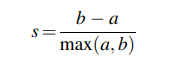

# Silhouette coefficient in the scikit-learn library

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled = scaler.fit(df)

df_scaled = scaler.transform(df)

df_scaled

array([[-1.31654221, -1.63691997,  0.07053355, ...,  0.85324677,
         1.64018978,  0.88856422],
       [ 0.39613573, -1.19092098, -0.18063471, ..., -0.08890975,
         1.16403195, -0.00377924],
       [ 0.26439127, -0.81507913, -1.05972362, ...,  0.22514243,
         0.80691358, -0.22746968],
       ...,
       [-0.03203375,  0.96891686, -0.30621884, ..., -0.7170141 ,
        -0.97867828, -1.12102229],
       [-0.52607547,  0.50287296, -1.05972362, ...,  0.5391946 ,
        -0.50252045,  0.55846969],
       [-0.32845878, -0.45928217, -0.43180297, ...,  1.16729895,
         0.44979521, -0.65913177]])

AttributeError: Text.set() got an unexpected keyword argument 'cluster_labels'

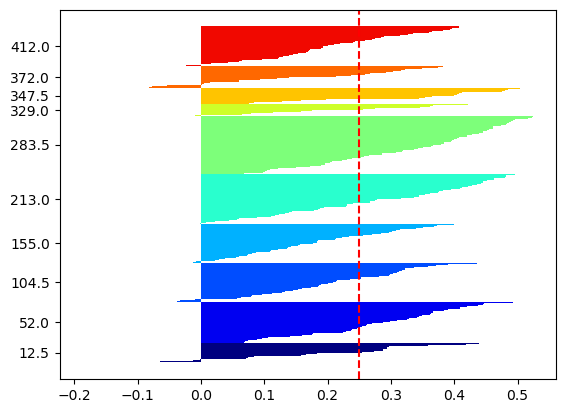

In [28]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(labels)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(df_scaled, labels, metric = 'euclidean')

y_ax_lower, y_ax_upper = 0,0

yticks = []

for i, c in enumerate (cluster_labels):
    c_silhouette_vals = silhouette_vals[labels == c]
    c_silhouette_vals.sort()
    
    y_ax_upper += len(c_silhouette_vals)
    
    color = cm.jet(float(i)/n_clusters)
    
    plt.barh(range(y_ax_lower,y_ax_upper), c_silhouette_vals,
             height = 1, edgecolor = 'none', color = color)
    
    yticks.append((y_ax_lower + y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color = "red", linestyle = "--")
plt.yticks(yticks, cluster_labels = 1)
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')

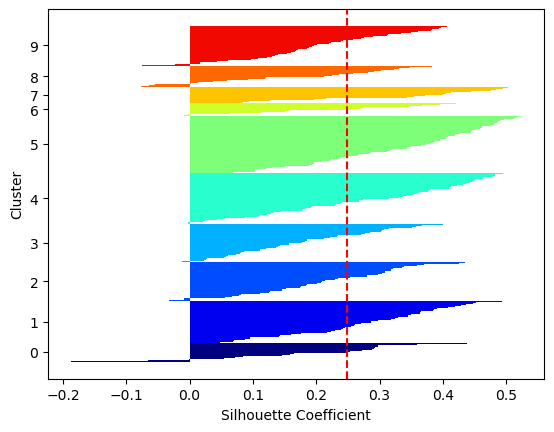

In [29]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'labels' and 'df_scaled' are already defined

cluster_labels = np.unique(labels)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(df_scaled, labels, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[labels == c]
    c_silhouette_vals.sort()

    y_ax_upper += len(c_silhouette_vals)
    
    color = cm.jet(float(i) / n_clusters)
    
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals,
             height=1, edgecolor='none', color=color)
    
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

# Corrected y-ticks
plt.yticks(yticks, cluster_labels)

plt.ylabel('Cluster')
plt.xlabel('Silhouette Coefficient')
plt.show()


This code generates a **Silhouette Plot** to visualize the silhouette coefficients of data points for each cluster. Below is a detailed explanation of each section of the code:

### 1. **Importing Libraries**
   ```python
   from matplotlib import cm  # For color mapping
   from sklearn.metrics import silhouette_samples  # For calculating silhouette values
   import numpy as np  # For array operations
   import matplotlib.pyplot as plt  # For plotting the results
   ```

   - **matplotlib.cm**: Provides color maps for plotting, allowing you to map values to colors.
   - **silhouette_samples**: A function from `sklearn.metrics` that computes the silhouette coefficient for each sample.
   - **numpy**: Used for array manipulations and mathematical functions.
   - **matplotlib.pyplot**: Provides plotting capabilities.

### 2. **Setup for Clusters and Silhouette Values**
   ```python
   cluster_labels = np.unique(labels)
   n_clusters = cluster_labels.shape[0]
   ```

   - **cluster_labels**: Extracts the unique cluster labels from `labels` (e.g., [0, 1, 2] if there are 3 clusters). This tells us how many clusters there are.
   - **n_clusters**: The number of unique clusters, obtained from `cluster_labels.shape[0]`.

   ```python
   silhouette_vals = silhouette_samples(df_scaled, labels, metric='euclidean')
   ```

   - **silhouette_vals**: This computes the silhouette coefficient for each sample in `df_scaled` using the Euclidean distance metric. Silhouette values range between -1 and +1 and indicate how well each point is clustered.

### 3. **Initializing Plot Variables**
   ```python
   y_ax_lower, y_ax_upper = 0, 0
   yticks = []
   ```

   - **y_ax_lower** and **y_ax_upper**: These variables will control the vertical positions of the bars in the silhouette plot.
   - **yticks**: This list will store the tick positions for labeling each cluster on the y-axis.

### 4. **Iterating Over Clusters to Plot Silhouette Values**
   ```python
   for i, c in enumerate(cluster_labels):
   ```

   This loop iterates over each unique cluster label `c`, where `i` is the index of the cluster and `c` is the cluster label itself.

   - **i**: Index (0, 1, 2, etc.) of the cluster.
   - **c**: Cluster label (e.g., 0, 1, 2).

   ```python
   c_silhouette_vals = silhouette_vals[labels == c]
   c_silhouette_vals.sort()
   ```

   - **c_silhouette_vals**: Extracts the silhouette values for all samples belonging to cluster `c` and sorts them in ascending order for a cleaner, stacked visualization.
   
   ```python
   y_ax_upper += len(c_silhouette_vals)
   ```

   - **y_ax_upper**: Moves the upper boundary of the y-axis to account for the number of samples in the current cluster. This ensures that bars representing each cluster are stacked on top of each other.

   ```python
   color = cm.jet(float(i) / n_clusters)
   ```

   - **color**: Generates a color for the current cluster `i` using the `jet` colormap from matplotlib. `i / n_clusters` maps the cluster index `i` to a range between 0 and 1 for color selection.

   ```python
   plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals,
            height=1, edgecolor='none', color=color)
   ```

   - **plt.barh()**: Creates a horizontal bar plot.
     - **range(y_ax_lower, y_ax_upper)**: Specifies the range of y-values where the bars will be drawn.
     - **c_silhouette_vals**: Specifies the width of each bar (the silhouette value for each sample).
     - **height=1**: Sets the height of each bar to 1.
     - **color=color**: Assigns the color to the current cluster.
     - **edgecolor='none'**: Ensures that there are no borders around the bars.

   ```python
   yticks.append((y_ax_lower + y_ax_upper) / 2)
   y_ax_lower += len(c_silhouette_vals)
   ```

   - **yticks**: Stores the middle point between `y_ax_lower` and `y_ax_upper` for labeling the y-axis with the corresponding cluster label.
   - **y_ax_lower**: Updates the lower boundary for the next cluster by adding the number of samples in the current cluster (`len(c_silhouette_vals)`).

### 5. **Plotting the Average Silhouette Coefficient**
   ```python
   silhouette_avg = np.mean(silhouette_vals)
   plt.axvline(silhouette_avg, color="red", linestyle="--")
   ```

   - **silhouette_avg**: The average silhouette score across all samples. This provides an overall indication of the clustering quality.
   - **plt.axvline()**: Draws a vertical dashed red line at the average silhouette score for reference, helping to visualize how individual clusters compare to the overall average.

### 6. **Final Plot Adjustments and Display**
   ```python
   plt.yticks(yticks, cluster_labels)
   plt.ylabel('Cluster')
   plt.xlabel('Silhouette Coefficient')
   plt.show()
   ```

   - **plt.yticks(yticks, cluster_labels)**: Adds y-tick labels (cluster labels) at the positions stored in `yticks`.
   - **plt.ylabel('Cluster')**: Sets the label of the y-axis to "Cluster".
   - **plt.xlabel('Silhouette Coefficient')**: Sets the label of the x-axis to "Silhouette Coefficient".
   - **plt.show()**: Displays the plot.

### Summary of the Plot:
- The **horizontal bars** represent the silhouette values for individual samples in each cluster.
- **Clusters with positive silhouette values** (closer to +1) are well-defined and separated from neighboring clusters.
- **Clusters with negative values** indicate potential misclassification or overlap with other clusters.
- The **red dashed line** represents the overall average silhouette score for all clusters.

This plot provides an intuitive way to visually assess the quality of clustering and see which clusters are well-defined and which ones may need improvement.

# Hierarchical Clustering

**Hierarchical clustering** is a method of clustering that builds a hierarchy of clusters based on similarity (or distance) between data points. The process results in a **dendrogram**, which is a tree-like structure showing how clusters are merged or split. Unlike **k-means**, you don’t need to specify the number of clusters beforehand.

There are two main types of hierarchical clustering:

1. **Agglomerative hierarchical clustering (bottom-up approach)**
2. **Divisive hierarchical clustering (top-down approach)**

---

## 1. Agglomerative Hierarchical Clustering (Bottom-Up)

- **How it works**: 
  - At the start, each data point is treated as its own cluster (so, if there are 10 points, you have 10 clusters).
  - Then, it repeatedly merges the closest clusters based on a distance metric (like Euclidean distance).
  - This merging continues until there’s only one cluster that contains all the data points.

### Example:
Imagine you have 5 points representing houses on a map: A, B, C, D, and E.

| Houses | Coordinates |
|--------|-------------|
| A      | (1, 1)      |
| B      | (2, 1)      |
| C      | (4, 3)      |
| D      | (5, 4)      |
| E      | (8, 7)      |

1. **Initial clusters**: You start with 5 clusters (one for each house: {A}, {B}, {C}, {D}, {E}).
2. **First merge**: Find the two closest clusters. Let’s say A and B are the closest based on Euclidean distance, so you merge them: {A, B}, {C}, {D}, {E}.
3. **Next merge**: Now, {A, B} might be closest to C. So, merge them: {A, B, C}, {D}, {E}.
4. **Continue merging**: Eventually, you’ll have two clusters: {A, B, C, D}, {E}.
5. **Final merge**: Merge the two remaining clusters into one: {A, B, C, D, E}.

You stop when all points are in one cluster. The result is a tree showing which points merged first (closer) and which merged later (farther apart).

---

## 2. Divisive Hierarchical Clustering (Top-Down)

- **How it works**:
  - Start with all data points in one cluster.
  - Then, iteratively split the cluster by separating the most dissimilar data points, eventually ending up with one data point per cluster.

### Example:
Using the same 5 houses:

1. **Initial cluster**: All houses are in one cluster: {A, B, C, D, E}.
2. **First split**: The farthest point (let's say E) is separated from the rest: {A, B, C, D}, {E}.
3. **Next split**: In the cluster {A, B, C, D}, the farthest point (let’s say D) is split out: {A, B, C}, {D}, {E}.
4. **Continue splitting**: You split clusters until each house is its own cluster: {A}, {B}, {C}, {D}, {E}.

---

## Key Differences Between Agglomerative and Divisive:
- **Agglomerative**: Start with each point in its own cluster and merge until there’s one cluster.
- **Divisive**: Start with one big cluster and split until each point is its own cluster.

---

## Example with Real Data:
Let’s say you’re clustering customers in a store based on their shopping behavior.

### Agglomerative Approach:
- Start with each customer as a separate cluster.
- Merge the two most similar customers based on their behavior (e.g., how much they buy, the type of products they prefer).
- Keep merging until all customers are in one big cluster. You can cut the dendrogram at a certain height to form groups of customers with similar behavior.

### Divisive Approach:
- Start with all customers in one cluster.
- Identify the most dissimilar customer and split them from the group.
- Keep splitting until each customer is in their own group.

---

## Why Use Hierarchical Clustering?
1. **No need to predefine clusters**: Unlike k-means, you don’t need to specify how many clusters to use upfront.
2. **Visual representation**: The dendrogram visually shows how clusters are formed, which can help in understanding the structure of your data.
3. **Flexible**: It can be used for any data, including data where you want to see hierarchical relationships (e.g., evolutionary trees).


## Implementing dendrogram and hierarchical clustering in scikit-learn library

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_excel('Chapter4_ GIP_EUR_DataSet.xlsx')
df.describe()

,GIP (BCFperSection),EURper1000ft
count,200.00000,200.000000
mean,199.84800,2.201754
std,86.67358,1.132611
min,49.50000,0.043860
25%,136.95000,1.524123
50%,202.95000,2.192982
75%,257.40000,3.201754
max,452.10000,4.342105


# Step 1
* Let’s standardize the data prior to applying hierarchical clustering as
follows:

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit(df)
df_scaled = scaler.transform(df)

# Step 2
* Let’s create the dendrogram.
    - First, "import scipy.cluster.hierarchy as shc" library.

* Please make sure to pass along "df_scaled" which is the standardized version of the data set in **"dend = shc.dendrogram(shc.linkage(df_scaled, method = 'ward'))."**

Text(0, 0.5, 'Distance')

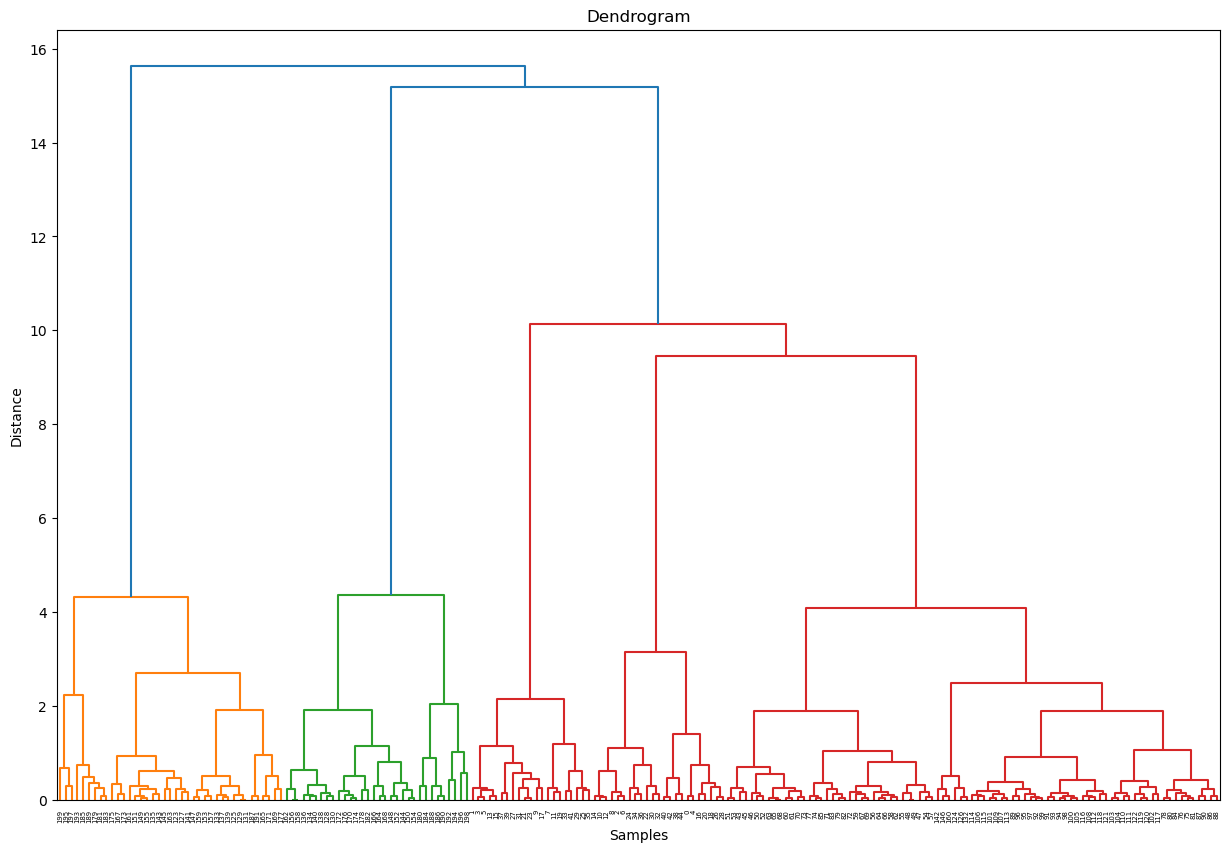

In [32]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize = (15, 10))
dend = shc.dendrogram(shc.linkage(df_scaled, method = 'ward'))

plt.title("Dendrogram")
plt.xlabel('Samples')
plt.ylabel('Distance')

# Step 3
* Let’s now import agglomerative clustering and apply agglomerative clustering to "df_scaled" data frame.

* Under
"AgglomerativeClustering," number of desired clusters can be accessed with
attribute **"n_clusters"**, "affinity" returns the metric used to compute the
linkage.

* The "linkage"
parameter can be set as (i) ward, (ii) average, (iii) complete or maximum, and
(iv) singl

* According to scikit-learn library;
    - "ward" minimizes the variance of the clusters being merged.
    - "average" uses the average of the distances of each
observation of the two sets.
    - "complete" or "maximum" linkage uses the
maximum distances between all observations of the two sets.
    - "single" uses the
minimum of the distances between all observations of the two sets.

* The default
linkage of "ward" was used in this example.

* After defining the hierarchical
clustering criteria under "HC," apply **"fit_predict()"** to the standardized data
set (df_scaled).e.

In [33]:
from sklearn.cluster import AgglomerativeClustering

HC = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean',
                            linkage = 'ward')

HC = HC.fit_predict(df_scaled)
HC

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [34]:
from sklearn.cluster import AgglomerativeClustering

HC = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean',
                            linkage = 'ward')

HC = HC.fit_predict(df_scaled)
HC

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

# Step 4
* Let’s convert the "df_scaled" to a data frame using panda’s "pd.DataFrame."

* Afterward, apply the silhouette coefficient to this data set as illustrated below.

In [35]:
df_scaled = pd.DataFrame(df_scaled, columns = df.columns[0:2])

df_scaled['Clusters'] = HC
df_scaled

,GIP (BCFperSection),EURper1000ft,Clusters
0,-1.738999,-0.434801,4
1,-1.738999,1.195704,3
2,-1.700830,-1.715913,4
3,-1.700830,1.040418,3
4,-1.662660,-0.395980,4
...,...,...,...
195,2.268791,1.118061,1
196,2.497807,-0.861839,0
197,2.497807,0.923953,1
198,2.917671,-1.250054,0


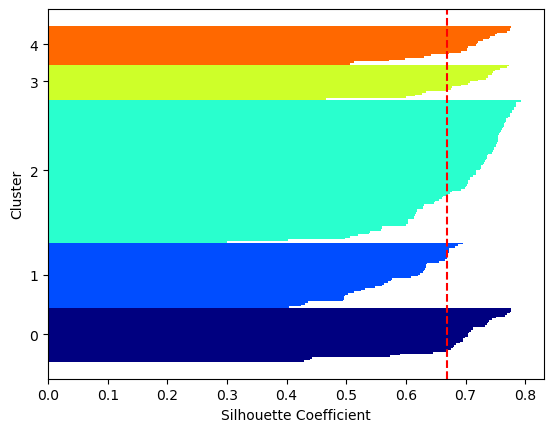

In [37]:
# Applying Silhouette Coefficient to the data set

from matplotlib import cm
from sklearn.metrics import silhouette_samples
import numpy as np
import matplotlib.pyplot as plt


cluster_labels = np.unique(HC)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(df_scaled, HC, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0

yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[HC == c]
    c_silhouette_vals.sort()

    y_ax_upper += len(c_silhouette_vals)
    
    color = cm.jet(float(i) / n_clusters)
    
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals,
             height=1, edgecolor='none', color=color)
    
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

# Corrected y-ticks
plt.yticks(yticks, cluster_labels)

plt.ylabel('Cluster')
plt.xlabel('Silhouette Coefficient')
plt.show()

# Step 5
* Let’s unstandardize the data and show the mean of each cluster:

In [40]:
df_scaled['GIP (BCFperSection)'] = (df_scaled['GIP (BCFperSection)']\
            * (df['GIP (BCFperSection)'].std()) + df['GIP (BCFperSection)'].mean())

df_scaled['EURper1000ft'] = (df_scaled['EURper1000ft'] * \
                    (df['EURper1000ft'].std()) + df['EURper1000ft'].mean())

Group_by = df_scaled.groupby(by = 'Clusters').mean()
Group_by

,GIP (BCFperSection),EURper1000ft
Clusters,,
0,295.279503,0.680128
1,285.792052,3.605628
2,184.139503,2.154681
3,82.520600,3.514146
4,86.520674,0.914015


> **Note**: 
> Dendrogram in hierarchical clustering can be used to get a sense of the number of clusters to choose prior to applying k-means clustering. 
> 
> In other words, if you're unsure of selecting the number of clusters before applying k-means clustering, a dendrogram can help identify the optimal number of clusters.
>
> This approach is another method in addition to the **elbow method** and **silhouette analysis**, which were previously discussed under the k-means clustering section.


# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

### What is DBSCAN?
DBSCAN is a density-based clustering algorithm where data points are grouped into clusters based on the density of data points around them. High-density regions are considered clusters, and low-density regions separate them.

### Key Concepts
1. **Core point**: A point with at least `MinPts` number of neighbors (within a radius ε) is considered a core point. It is central to a cluster.
2. **Border point**: A point that is not a core point but is within the neighborhood of a core point (within distance ε).
3. **Noise point**: A point that is neither a core point nor a border point. It is considered an outlier or noise.

### DBSCAN Parameters:
- **ε (epsilon)**: Defines the radius around a point to check for neighbors.
- **MinPts**: The minimum number of points within the ε-radius for a point to be considered a core point.

### Why Use DBSCAN?
- **Handles Arbitrary Shaped Clusters**: DBSCAN is great for detecting clusters of any shape (unlike k-means which assumes spherical clusters).
- **Detects Outliers (Noise)**: It can identify and remove noise points.
- **No Need to Predefine Number of Clusters**: DBSCAN automatically determines the number of clusters based on ε and MinPts.

---

### How Does DBSCAN Work? 

1. **Start with a random point**:
   - DBSCAN starts by picking an arbitrary point.
   
2. **Check neighbors within ε-radius**:
   - DBSCAN checks how many points are within the ε-radius of that point.
   
3. **Determine if it's a core point**:
   - If the point has at least `MinPts` neighbors within the radius, it becomes a **core point** and starts forming a cluster.
   - If it doesn’t meet the criteria, it is labeled as **noise**, but it could later become part of another cluster if it falls within the ε-radius of a core point.

4. **Expand the cluster**:
   - From a core point, DBSCAN expands the cluster by looking at all points within the ε-radius, marking them as part of the same cluster.
   - The process continues by checking each neighboring point.

5. **Repeat for all points**:
   - The process repeats for every point in the dataset. Points can either:
     - Be assigned to a cluster.
     - Be labeled as noise.

---

### Example: Clustering Houses Based on Location

Let's say you have a dataset of houses with coordinates on a 2D plane:

| House | X-Coordinate | Y-Coordinate |
|-------|--------------|--------------|
| A     | 1            | 1            |
| B     | 1.5          | 1.2          |
| C     | 4            | 5            |
| D     | 4.2          | 5.1          |
| E     | 10           | 10           |

#### Step-by-Step:
1. **Set ε = 2** and **MinPts = 3**.
   
2. **Start with House A**:
   - Look within a radius of 2 units around House A.
   - Let’s say A, B are within this radius, but since `MinPts = 3` and we only have 2 neighbors (A and B), House A is labeled as **noise** for now.
   
3. **Move to House C**:
   - Now, check House C. The neighboring houses within the 2-unit radius are C and D.
   - Since there are only 2 points, and `MinPts = 3`, this is also **noise**.

4. **Find larger clusters**:
   - If we relax `MinPts` to 2 and rerun the algorithm, A and B would form one cluster, and C and D would form another cluster.

5. **Identify noise**:
   - House E is far away from others and will be labeled as a **noise point** since it doesn’t have any neighbors within the 2-unit radius.

---

### Hyperparameter Tuning
- **Choosing ε and MinPts**: 
   - If **ε** is too small, DBSCAN might classify too many points as noise.
   - If **ε** is too large, DBSCAN might form just one big cluster.
   - Typically, **MinPts = 4** is recommended for 2D data, but for higher-dimensional data, **MinPts = 2 * dimensions**.
   - Use the **k-nearest neighbor (KNN) distance graph** to find the "elbow point" to set the appropriate ε value.

---

### Visualization
After running DBSCAN, it’s important to **visualize the results** to interpret the clusters and noise. You can plot the data points with clusters in different colors and highlight the noise points to see how well the algorithm performed.

---

### Key Advantages:
1. **No need for a predefined number of clusters**.
2. **Can detect clusters of arbitrary shapes**.
3. **Handles noise** by classifying outliers separately.

### Challenges:
- **Choosing ε and MinPts** requires careful tuning and domain expertise. 
- **DBSCAN doesn’t work well with varying density clusters** because it assumes the same density for all clusters.

---

### Summary:
DBSCAN is a powerful and flexible clustering algorithm that works well for large datasets with arbitrary-shaped clusters. It automatically detects noise and doesn’t require the number of clusters to be predefined. However, choosing the right ε and MinPts values is crucial for its success.



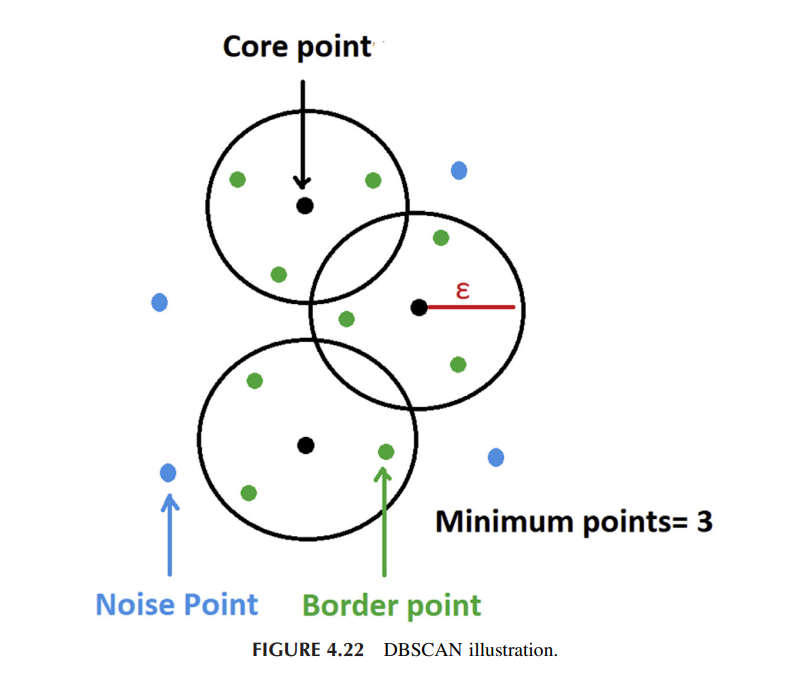

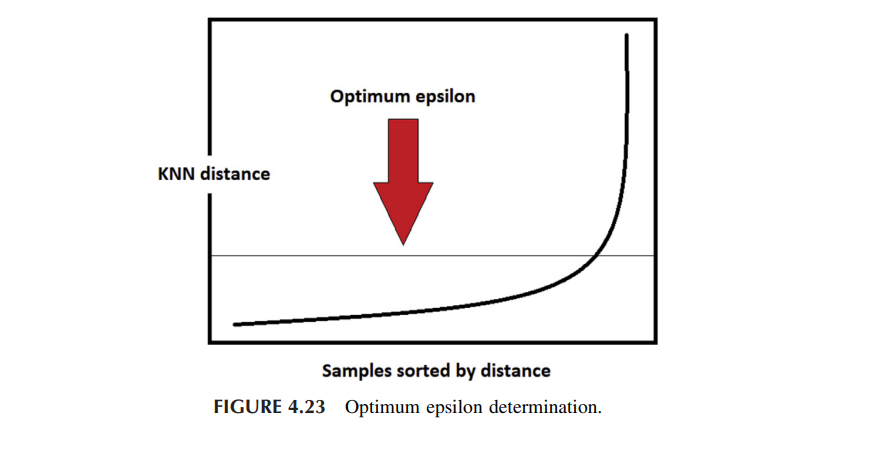

## DBSCAN implementation and example in scikit-learn library
* Let’s apply DBSCAN using the scikit-learn to a data set with 1007 wells
including Young’s modulus, Poisson’s ratio, and closure pressure (minimum
horizontal stress

* . The exercise is to use DBSCAN to cluster the data. First,
import the DBSCAN clustering csv file using the following link:

# Step 1
- Import all the necessary libraries as
well as "Chapter4_Geomechanics_DataSet.csv" file as follows:

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


df = pd.read_csv('Chapter4_Geomechanics_DataSet.csv')
df.describe()

,Closure Pressure (psi),YM (MMpsi),PR
count,1007.000000,1007.000000,1007.000000
mean,9500.000000,5.000000,0.250000
std,2212.788225,0.395503,0.066015
min,1479.148671,4.474815,0.034032
25%,7924.313997,4.686613,0.206557
50%,9737.579335,4.776741,0.249805
75%,11321.568010,5.451288,0.291797
max,13264.890570,5.858267,0.458470


# Step 2
* Use the seaborn library to visualize the distribution of each
parameter.

C:\Users\Emmanuel Nkrumah\AppData\Local\Temp\ipykernel_11388\549682777.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Closure Pressure (psi)'], label = 'Clustering Data',
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


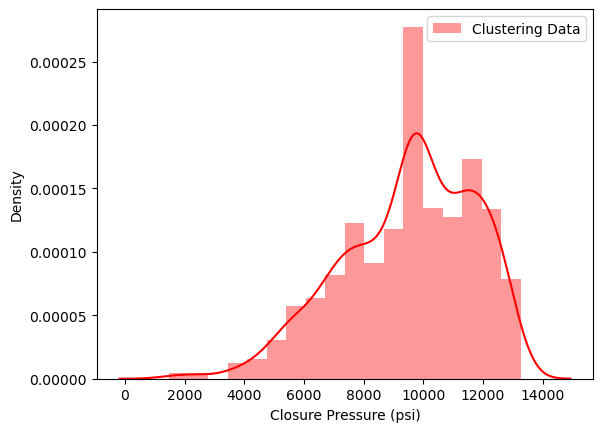

In [43]:
sns.distplot(df['Closure Pressure (psi)'], label = 'Clustering Data',
            norm_hist = True, color = 'r')

plt.legend()

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


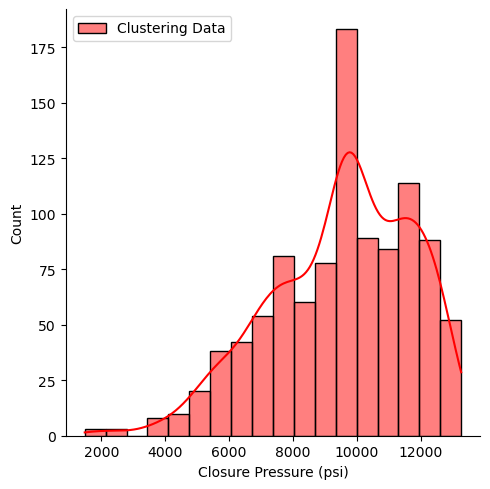

In [45]:
sns.displot(df['Closure Pressure (psi)'], label = 'Clustering Data',
            color = 'r', kde = True)

plt.legend()

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


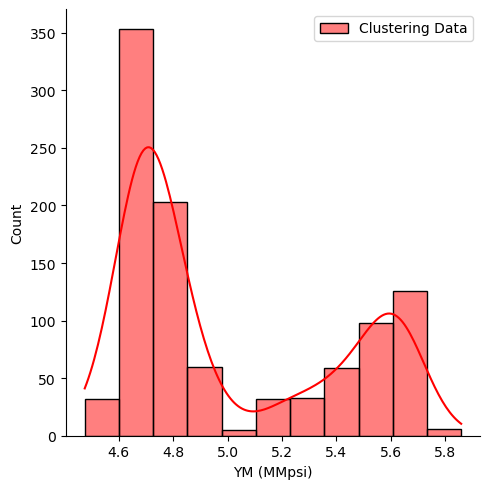

In [46]:
sns.displot(df['YM (MMpsi)'], label = 'Clustering Data',
            color = 'r', kde = True)

plt.legend()

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


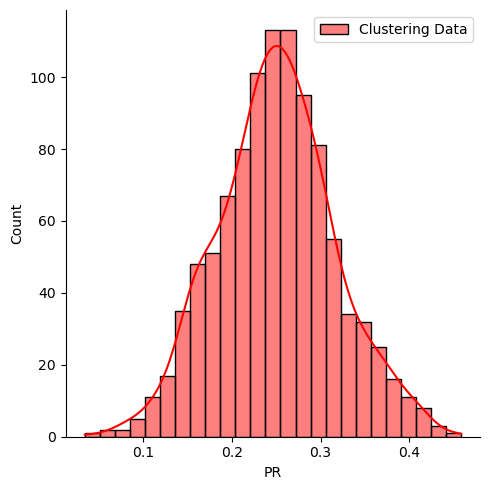

In [47]:
sns.displot(df['PR'], label = 'Clustering Data',
            color = 'r', kde = True)

plt.legend()

# Step 3
* Let’s standardize the data as follows:

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit(df)
df_scaled = scaler.transform(df)

# Step 4
* Before applying DBSCAN, it is important to estimate the value of epsilon
using the KNN library.

* Therefore, first import the library followed by applying
KNN with 6 neighbors.

* The reason for picking 6 is because this is a three-dimensional database where 2*number of dimensions is recommended to be
used for MinPts.

* Since MinPts is 6, the number of neighbors chosen to be used
in the KNN algorithm is also 6.

* Therefore, after creating a KNN model with
K = 6, that created model can be used to fit **"df_scaled"** (standardized data).

In [49]:
from sklearn.neighbors import NearestNeighbors

Neighbors = NearestNeighbors(n_neighbors = 6)

nbrs = Neighbors.fit(df_scaled)

distances, indices = nbrs.kneighbors(df_scaled)

# Step 5
* Sort and plot the results as follows:

Text(0, 0.5, '6th NN distance')

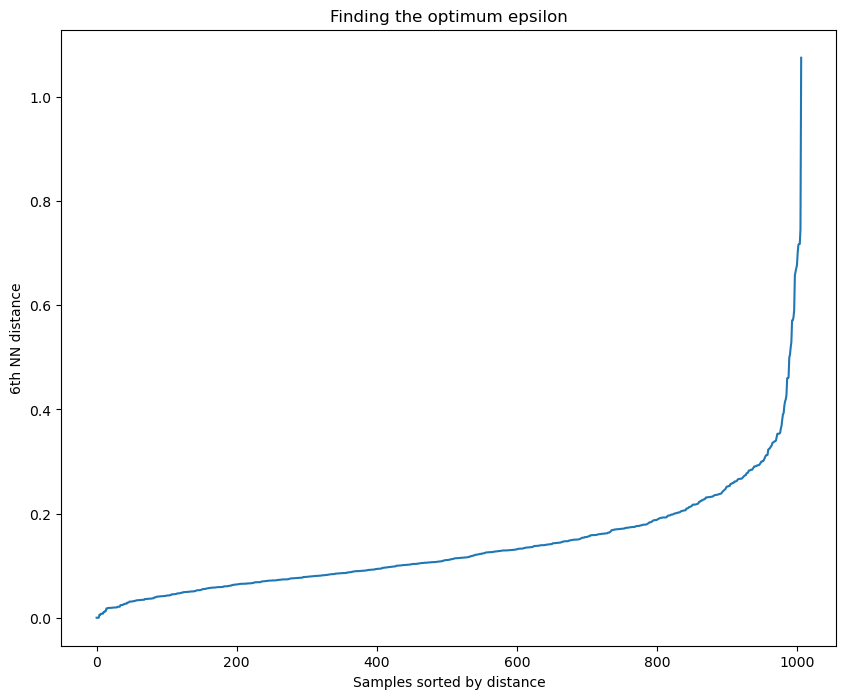

In [50]:
fig = plt.figure(figsize = (10,8))

distances = np.sort(distances, axis = 0)

distances = distances[:,1]

plt.plot(distances)
plt.title('Finding the optimum epsilon')
plt.xlabel('Samples sorted by distance')
plt.ylabel('6th NN distance')

# Step 6
* As illustrated above, optimum epsilon is approximately 0.3.

* Next,
let’s import the DBSCAN library and apply DBSCAN to **"df_scaled."**

* Note that "eps" is the term used to represent epsilon in the DBSCAN algorithm
within the scikit-learn library.

* According to the scikit-learn library, **"min_sample"** refers to "the number of samples in a neighborhood for a point to be
considered as a core point which includes the point itself."

* In other words,
**"min_sample"** is referred to as **MinPts** that was discussed earlier.

In [51]:
from sklearn.cluster import DBSCAN

Clustering = DBSCAN(eps = 0.3, min_samples = 6, metric = 'euclidean')

DB = Clustering.fit_predict(df_scaled)

### To get the label for each data row and convert to a data frame, the following lines can be executed:

In [52]:
labels = pd.DataFrame(DB, columns = ['clusters'])
labels

,clusters
0,0
1,0
2,0
3,0
4,0
...,...
1002,-1
1003,0
1004,0
1005,0


# Step 7
* Let’s add the **clusters** to the standardized data (df_scaled).

* Once the
data are in a data frame, convert the input features (YM, PR, and closure
pressure) to its **original state (prior to standardization)**.

In [53]:
df_scaled = pd.DataFrame(df_scaled, columns = df.columns[0:3])

df_scaled['clusters'] = DB

df_scaled['Closure Pressure (psi)'] = (df_scaled['Closure Pressure (psi)'] *\
        (df['Closure Pressure (psi)'].std()) + df['Closure Pressure (psi)'].mean())


df_scaled['YM (MMpsi)'] = (df_scaled['YM (MMpsi)']* (df['YM (MMpsi)'].std()) +\
                           df['YM (MMpsi)'].mean())


df_scaled['PR'] = (df_scaled['PR']* (df['PR'].std()) + df['PR'].mean())

# Step 8
* Next, let’s take the average and groupby the cluster column.

* As illustrated,
there are 9 resulting clusters.

* As was discussed earlier, the number of clusters
is determined and calculated based on epsilon and MinPts defined.

* Therefore,
after applying any type of clustering algorithm, it is extremely important to
visualize the data to make sure the resulting clusters make sense.

* Since this is a
synthetically generated database, the resulting clusters are not plotted based on
their latitude and longitude.

* However, please make sure to plot the resulting
clusters on any database to obtain more knowledge from the resulting clusters.

* The ***"-1"*** cluster below indicates the **outlier points**.

* **DBSCAN** is one of the
many methodologies that can be used for **outlier detection**.

In [54]:
Group_by_mean = df_scaled.groupby(by = 'clusters').mean()

Group_by_mean

,Closure Pressure (psi),YM (MMpsi),PR
clusters,,,
-1,8559.325853,5.093442,0.251312
0,9103.763751,4.721670,0.269255
1,9923.806912,4.698112,0.379960
2,8606.155092,5.569215,0.193501
3,11175.672378,5.502061,0.244701
4,6054.320378,4.748625,0.088967
5,4656.636445,4.632924,0.140017
6,9868.815507,4.483571,0.268379
7,12062.134910,5.625208,0.159870


# Important Notes About Clustering

- **Clustering Limitations**: While unsupervised clustering techniques are powerful for extracting information from data, they may not always be the best choice. In cases where data already has labeled classes, supervised machine learning (ML) could yield better results.

- **When to Use Clustering**: If labeling data is time-consuming, unsupervised clustering can help. For instance, in the oil and gas industry, k-means clustering was successfully used for liquid-loading clustering, categorizing data into loaded and unloaded states without relying on older methods.

- **Cluster Validation**: Validating clusters is crucial. The silhouette coefficient is one way to assess cluster quality. A low average silhouette coefficient (e.g., 0.2) suggests that clustering may not reveal meaningful insights, indicating that supervised ML could be more effective.

- **Statistical Measures**: It's essential to apply basic statistical measures, such as the mean of each cluster, after clustering. For example, when clustering data on gas rate, casing-tubing pressure, line pressure, and water rate, understanding these statistics helps to interpret the results effectively.

# Outlier Detection

- **Definition of Terms**:
  - **Outlier**: An outlier is a data point that significantly differs from the rest of the data set. For example, in a scenario where the average Gas Initially In Place (GIP) ranges between 100 and 200 BCF/section, a point with a GIP of 20 or 350 BCF/section would be considered an outlier.
  - **Anomaly Detection**: This refers to the process of identifying outliers within a data set. 

- **Applications**: 
  - Anomaly detection is widely used across various industries, including:
    - **Banking**: Detecting unusual transactions or large deposits, which can help prevent fraud. For instance, customers might be contacted by banks for verification of suspicious transactions.
    - **Insurance**: Identifying fraudulent insurance claims and payments.
    - **Manufacturing and Oil & Gas**: Monitoring equipment for abnormal behavior to facilitate preventative maintenance and predict failures. For example, detecting irregularities in frac pumps can enhance their lifespan.
    - **IT**: Identifying network intrusions to safeguard systems.

- **Algorithms**: Numerous algorithms exist for anomaly detection, with DBSCAN being one of the options mentioned. However, since it has already been discussed, it will not be covered in this section.

### Isolation Forest

- **Definition**: 
  - The Isolation Forest is an unsupervised machine learning algorithm designed for anomaly detection. It operates on the principle of isolating anomalies within a dataset (Tony Liu et al., 2008). 

- **Mechanism**: 
  - The algorithm employs a decision tree approach to isolate data points. The process includes:
    1. **Random Feature Selection**: A feature is randomly chosen from the dataset.
    2. **Random Split Value Selection**: A random split value is selected between the minimum and maximum values of that feature.
    3. **Isolation Process**: 
       - If the chosen split value keeps the point above the threshold, the minimum value of the feature range is updated to that split value.
       - If the chosen split keeps the point below the threshold, the maximum value is updated instead.
    4. This process is repeated until the points are isolated.
  
- **Isolation Number**: 
  - The number of iterations required to isolate a point is termed the "isolation number." A lower isolation number indicates a more anomalous point, as it requires fewer random partitions to be identified as an anomaly. 

- **Ensemble of Isolation Trees**: 
  - The Isolation Forest uses an ensemble of isolation trees, controlled by the parameter "n_estimators," to enhance anomaly detection.

- **Anomaly Score Calculation**:
  - The anomaly score for a point can be calculated using the following equation:


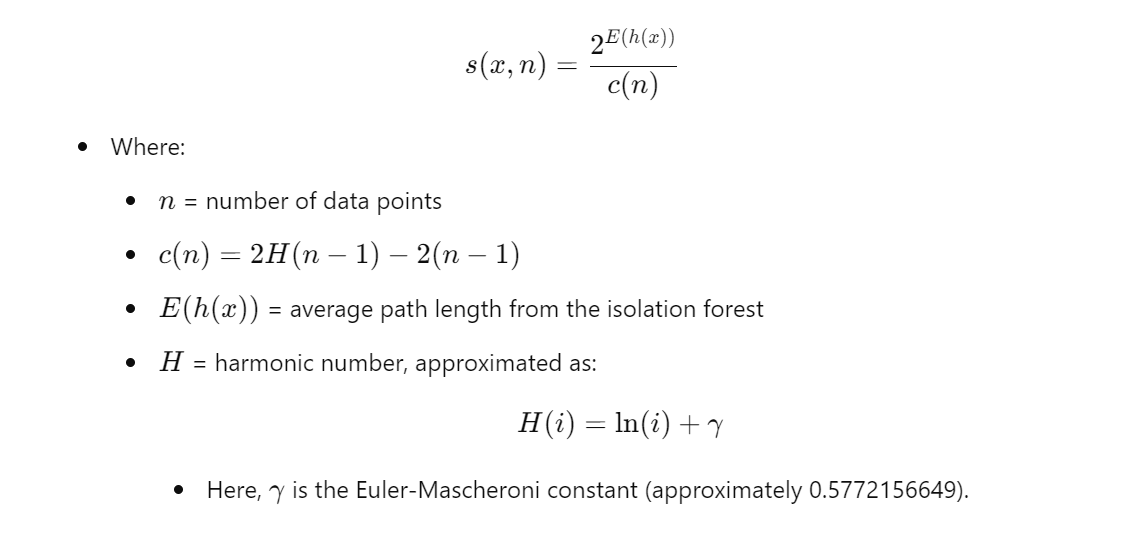

# Isolation forest using scikit-learn
* Let’s go over an example of using isolation forest to find the outliers in a
petroleum engineer’s income versus spending habit data set. The data set can
be found using the link below:

# Step 1
* Let’s import all the necessary libraries (pandas, numpy, and regular visualization libraries) to get started and import "Chapter4_PE_Income_
Spending_DataSet.csv" data set.

* As illustrated below, this data set has 4
columns of data and one of the columns is a categorical feature of petroleum
engineer’s gender.

* Therefore, it is crucial to convert this categorical feature to
a dummy/indicator variable using the "pd.get_dummies" method in pandas
library.

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Chapter4_PE_Income_Spending_DataSet.csv')
df.describe()

,Petroleum_Engineer_Age,Petroleum_Engineer_Income (K$),Spending_Habits (From 1 to 100)
count,200.000000,200.000000,200.000000
mean,38.850000,140.000000,47.690000
std,13.969007,60.717651,24.532346
min,18.000000,34.676354,0.950000
25%,28.750000,95.937913,33.012500
50%,36.000000,142.173052,47.500000
75%,49.000000,180.317041,69.350000
max,70.000000,316.710700,94.050000


### One-Hot Encoding with `pd.get_dummies`

- **Purpose**: 
  - The `pd.get_dummies` function in pandas is used to convert categorical variables into a format that can be provided to machine learning algorithms. It creates a new binary column for each category in the categorical feature, replacing the original category with 0s and 1s.

- **Example**: 
  - For a column named `petroleum_engineer_gender` with two categories, applying `pd.get_dummies` will result in the addition of two new columns:
    - `Petroleum_Engineer_Gender_Male`
    - `Petroleum_Engineer_Gender_Female`

- **Note on Dimensionality**: 
  - When representing categorical features, it is sufficient to use \( k-1 \) columns, where \( k \) is the number of categories. For example, if there are two categories (Male and Female), only one additional column is necessary.

- **Using `drop_first=True`**: 
  - To simplify the dataset by dropping one of the columns, you can set `drop_first=True` in the `pd.get_dummies` method. This is particularly useful to avoid the "dummy variable trap" in regression models. 
  - **Default Behavior**: 
    - By default, the `drop_first` parameter in pandas is set to `False`, which means all category columns will be created. 

#### Example Code
```python
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({
    'petroleum_engineer_gender': ['Male', 'Female', 'Female', 'Male']
})

# One-hot encoding with drop_first
df_encoded = pd.get_dummies(df, columns=['petroleum_engineer_gender'], drop_first=True)

print(df_encoded)


In [56]:
df = pd.get_dummies(df, drop_first = True)

df

,Petroleum_Engineer_Age,Petroleum_Engineer_Income (K$),Spending_Habits (From 1 to 100),Petroleum_Engineer_Gender_Male
0,19,34.676354,37.05,True
1,21,34.676354,76.95,True
2,20,36.988111,5.70,False
3,23,36.988111,73.15,False
4,31,39.299868,38.00,False
...,...,...,...,...
195,35,277.410832,75.05,False
196,45,291.281374,26.60,False
197,32,291.281374,70.30,True
198,32,316.710700,17.10,True


# Step 2
* Let’s also look at the box plot of "Petroleum_Engineer_Age," "Petroleum_Engineer_Income (K$)," and "Spending_Habits (From 1 to 100)".

* Make sure to place each box plot line of code shown below independently,
otherwise, the box plots will overlay.

<Axes: >

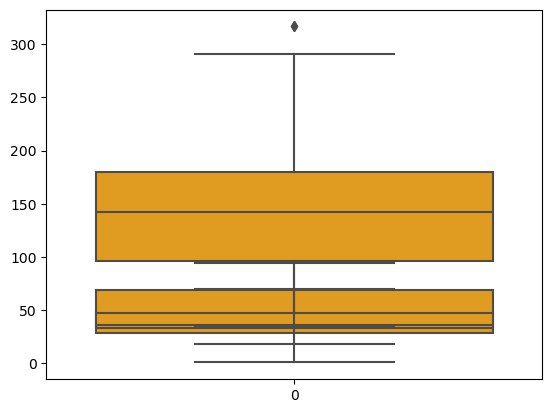

In [58]:
sns.boxplot(df['Petroleum_Engineer_Age'], color = 'orange')
sns.boxplot(df['Petroleum_Engineer_Income (K$)'], color = 'orange')
sns.boxplot(df['Spending_Habits (From 1 to 100)'], color = 'orange')

<Axes: >

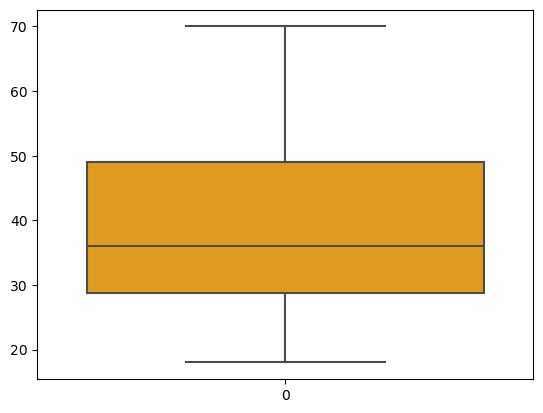

In [59]:
sns.boxplot(df['Petroleum_Engineer_Age'], color = 'orange')

<Axes: >

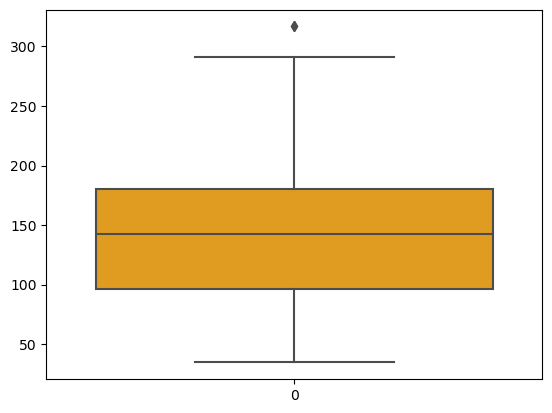

In [60]:
sns.boxplot(df['Petroleum_Engineer_Income (K$)'], color = 'orange')

<Axes: >

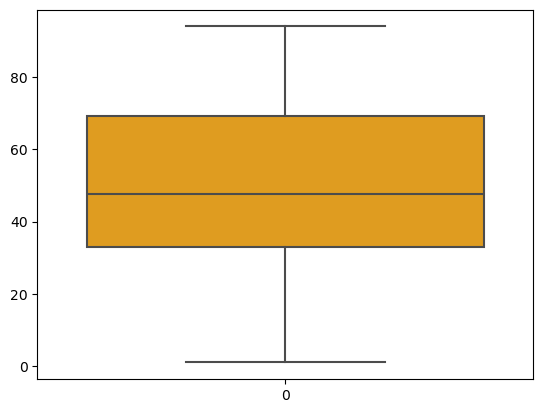

In [61]:
sns.boxplot(df['Spending_Habits (From 1 to 100)'], color = 'orange')

# Step 3
* Next, let’s import the isolation forest algorithm from the scikit-learn library
and apply it to the "df" data frame as shown below.

* "n_estimators" refers to
the number of trees in the ensemble that will get built in the forest.

* "max_-
sample" refers to the number of samples to draw to train each base estimator.


* If max_samples is set to be larger than the total number of samples provided,
all samples will be used for all trees. In other words, no sampling will be done.

* The next important parameter that has a significant impact on outlier detection
in a data set is referred to as **"contamination."**

* "contamination" refers to the
expected proportion of the outliers and it ranges between 0 and 1.

* The lower
the number, the less number of outliers that will be identified.

* Higher "contamination" values will lead to a higher number of outliers in a data set.

* Therefore, please spend a few minutes and change the contamination value
from 0.1 to 0.2, 0.3, ., 0.9 to observe the difference in outlier detection.

* Once
the clf model is defined, use "clf.fit(df)" to apply this defined model to the
"df" data frame.

In [62]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(n_estimators = 100, max_samples = 250,
                      random_state = 100, contamination = 0.1)

clf.fit(df)

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\ensemble\_iforest.py:307: UserWarning: max_samples (250) is greater than the total number of samples (200). max_samples will be set to n_samples for estimation.
  warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, max_samples=250, random_state=100)

* As shown in Fig. 4.32, the warning message essentially indicates that since
"max_sample" of 250 was entered as the input and it is greater than the total
number of samples (which is 200 in this exercise), "max_sample" will be set
to 200.

# Step 4
* Let’s obtain the isolation forest scores using "clf.decision_function(df)," place it in the "df" data frame, and use a histogram to plot
the "df['Scores']" as follows.

* The negative score values indicate presence of
anomalous points.

Text(0.5, 1.0, 'Histogram of Average Anomaly Scores: Lower Scores = More          Anomalous Samples')

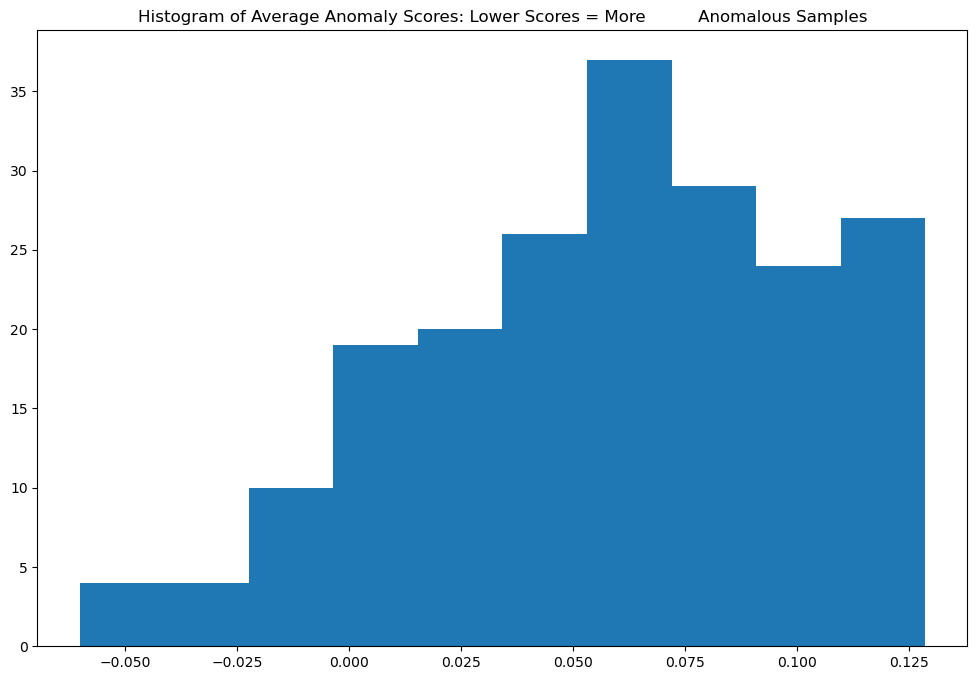

In [63]:
df['Scores'] = clf.decision_function(df)

plt.figure(figsize = (12,8))
plt.hist(df['Scores'])
plt.title('Histogram of Average Anomaly Scores: Lower Scores = More\
          Anomalous Samples')

#### Please feel free to call "df" to observe the resulting "df" data frame with the added "Scores" column.

In [64]:
df

,Petroleum_Engineer_Age,Petroleum_Engineer_Income (K$),Spending_Habits (From 1 to 100),Petroleum_Engineer_Gender_Male,Scores
0,19,34.676354,37.05,True,-0.032601
1,21,34.676354,76.95,True,-0.004939
2,20,36.988111,5.70,False,-0.060046
3,23,36.988111,73.15,False,0.054590
4,31,39.299868,38.00,False,0.048783
...,...,...,...,...,...
195,35,277.410832,75.05,False,0.008952
196,45,291.281374,26.60,False,-0.033078
197,32,291.281374,70.30,True,0.006787
198,32,316.710700,17.10,True,-0.044971


# Step 5
* The next step is to predict the anomalies by
applying "clf.predict(df.iloc[:,:4])" to the first 4 columns of "PE_Age,"
"PE_Income," "PE_Spending habits," and "PE_gender_male."

* Do not apply
the "predict" function to "df" since anomaly scores were added in the previous step.

* After applying the "predict" function to the first 4 columns, let’s
look at the resulting anomalous rows that were classified as "-1."

* "-1" means
presence of anomalies and "1" represents normal data points.

In [65]:
df['Anomaly'] = clf.predict(df.iloc[:,:4])

Anomaly = df.loc[df['Anomaly']==-1]

Anomaly_index = list(Anomaly.index)
Anomaly

,Petroleum_Engineer_Age,Petroleum_Engineer_Income (K$),Spending_Habits (From 1 to 100),Petroleum_Engineer_Gender_Male,Scores,Anomaly
0,19,34.676354,37.05,True,-0.032601,-1
1,21,34.676354,76.95,True,-0.004939,-1
2,20,36.988111,5.70,False,-0.060046,-1
6,35,41.611625,5.70,False,-0.006933,-1
8,64,43.923382,2.85,True,-0.058308,-1
10,67,43.923382,13.30,True,-0.058579,-1
12,58,46.235139,14.25,False,-0.012855,-1
14,37,46.235139,12.35,True,-0.010101,-1
18,52,53.170410,27.55,True,-0.008263,-1
30,60,69.352708,3.80,True,-0.011495,-1


# Step 6
* Finally, let’s visualize the outlier points on a scatter plot of PE_Income and
PE_Spending_Habits and color coded by the anomaly points.

Text(0.5, 1.0, 'Isolation Forests - Anomalies')

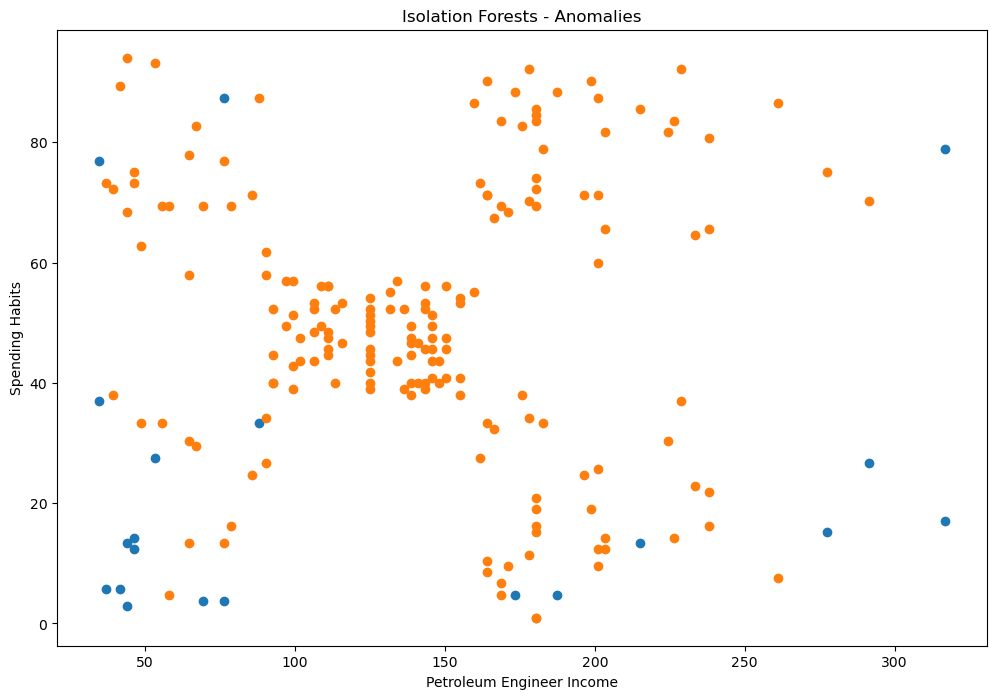

In [67]:
plt.figure(figsize = (12,8))

groups = df.groupby('Anomaly')


for name, group in groups:
    plt.plot(group['Petroleum_Engineer_Income (K$)'],
             group['Spending_Habits (From 1 to 100)'],
             marker='o', linestyle= '', label=name)

             
plt.xlabel('Petroleum Engineer Income')
plt.ylabel('Spending Habits')
plt.title('Isolation Forests - Anomalies')

## Local Outlier Factor (LOF)

The Local Outlier Factor (LOF) algorithm is a popular method for detecting outliers in a dataset, especially in scenarios where data distribution varies locally. Here's a breakdown of how LOF works, along with a detailed explanation of each step involved in the process:

### Overview of LOF

LOF identifies outliers by analyzing the density of data points in their local neighborhood. Unlike global outlier detection methods, LOF focuses on the local context of each data point. This is especially useful in datasets with clusters of varying densities, as it allows the algorithm to pinpoint anomalies relative to their immediate surroundings.

### Steps to Implement LOF

Here are the steps to implement the Local Outlier Factor algorithm:

#### Step 1: Calculate Distances
- **Objective:** Compute the distance between a point \(P\) and all other points in the dataset.
- **Distance Functions:** Common choices include:
  - **Euclidean Distance:** 
    $$
    d(P, Q) = \sqrt{\sum_{i=1}^{n}(P_i - Q_i)^2}
    $$
  - **Manhattan Distance:** 
    $$
    d(P, Q) = \sum_{i=1}^{n} |P_i - Q_i|
    $$

#### Step 2: Find k-Nearest Neighbors
- **Objective:** Identify the \(k\) closest points to \(P\).
- **Example:** If \(k = 3\), find the third nearest neighbor's distance to \(P\).

#### Step 3: Determine the k Closest Points
- **Objective:** Store the \(k\) closest points found in the previous step for further analysis.

#### Step 4: Compute Local Reachability Density (LRD)
- **Objective:** Calculate the local reachability density for each point using the following formula:

  $$
  \text{lrd}_k(O) = \frac{k}{\sum_{O' \in N_k(O)} \text{reachdist}_k(O', O)}
  $$

  - Here, \(N_k(O)\) is the set of \(k\) nearest neighbors of point \(O\).
  
- **Reachable Distance Calculation:**
  
  $$
  \text{reachdist}_k(O', O) = \max(\text{dist}_k(O), \text{dist}(O, O'))
  $$

#### Step 5: Calculate Local Outlier Factor (LOF)
- **Objective:** Determine the LOF for point \(O\) using the following formula:

  $$
  \text{LOF}_k(O) = \frac{\sum_{O' \in N_k(O)} \text{lrd}_k(O')}{\text{lrd}_k(O)} \cdot \frac{1}{k}
  $$

- A higher LOF value indicates that the point is more likely to be an outlier, as it suggests that the local density around \(O\) is significantly lower than that of its neighbors.

### Example Application of LOF

To illustrate how LOF works in practice, let’s consider a simple dataset of 2D points, where some points are clustered closely together and others are more dispersed. The LOF algorithm would proceed as follows:

1. **Calculate distances** between each point and the others.
2. **Find the k nearest neighbors** for a given point.
3. **Calculate the local reachability density** for each point based on the distances to its neighbors.
4. **Compute the LOF** value for each point.

Points with LOF values significantly greater than 1 can be considered outliers since their local density is much lower compared to their neighbors.

### Conclusion

The Local Outlier Factor is a powerful method for outlier detection, particularly in datasets with varying density. By focusing on local neighborhoods, LOF effectively identifies points that may not be outliers in the global context but are anomalies in their immediate vicinity.


# Local outlier factor using scikit-learn

# Step 1
* import the necessary libraries,
* import the isolation forest data set (call it df), apply "pd.get_dummies"
exactly as was shown previously, and standardize the data as follows:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Chapter4_PE_Income_Spending_DataSet.csv')

df = pd.get_dummies(df, drop_first = True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit(df)
df_scaled = scaler.transform(df)

# Step 2
* Let’s import the LOF library, define the model with 40 neighbors,
contamination of 0.1, use euclidean distance calculation, and apply
"fit(df_scaled)" as shown below.

* Please note that a large n_neighbor or K
could lead to points that are far away from the highest density regions to be
misclassified as outliers even though those points could be part of a cluster of
points.

* On the other hand, if K is too small, it could lead to misclassification
of outliers with respect to a very small local region of points.

* Therefore, it is
highly recommended to alternate K until a satisfactory level of outlier
detection is achieved.

In [3]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors = 40, contamination = .1,
                        metric = 'euclidean')

clf.fit(df_scaled)

LocalOutlierFactor(contamination=0.1, metric='euclidean', n_neighbors=40)

# Step 3
* The abnormality scores of the training samples can be obtained using "negative_outlier_factor_" attribute. Next, let’s plot "clf.negative_outlier_factor_"
in a histogram.

* Please note that smaller abnormality score indicates more
anomalous points.
    
* To find the outlier points, simply rank the abnormality score
from highest to lowest.

* The smallest values indicate the outlier points.

Text(0.5, 1.0, 'Histogram of Negative Outlier Factor')

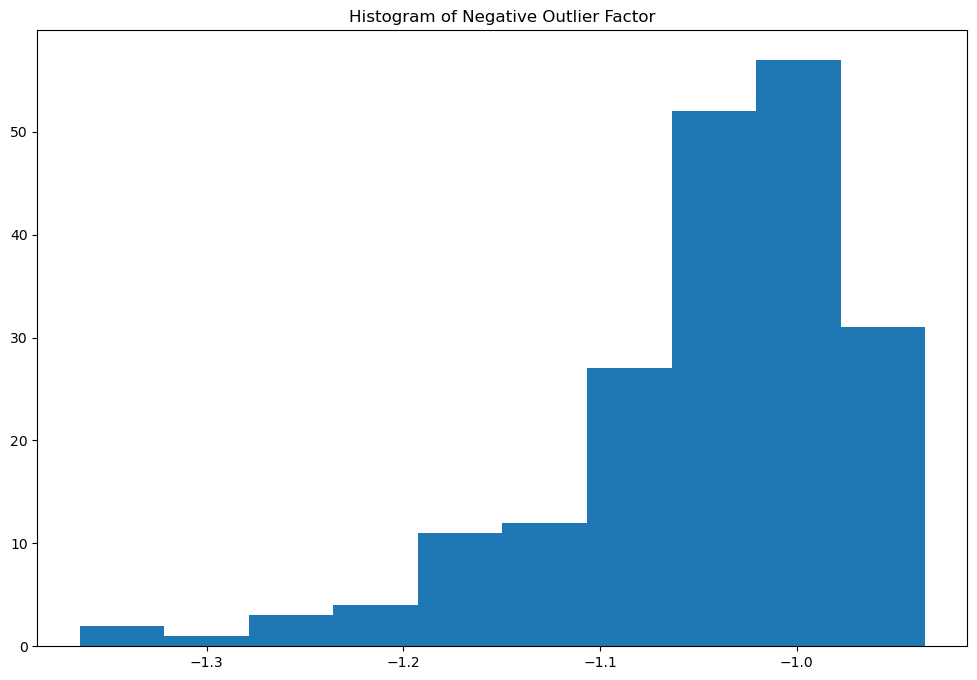

In [4]:
df_scaled=pd.DataFrame(df_scaled, columns = ['Petroleum_Engineer_Age',
                                           'Petroleum_Engineer_Income (K$)',
                                           'Spending_Habits (From 1 to 100)',
                                           'Petroleum_Engineer_Gender_Male'])


df_scaled['Scores'] = clf.negative_outlier_factor_

plt.figure(figsize = (12,8))
plt.hist(df_scaled['Scores'])
plt.title('Histogram of Negative Outlier Factor')

# Step 4
* Next, let’s use "clf.fit_predict" and apply it to the first 4 columns
(excluding the abnormality score column that was just added).

* Afterward,
locate the anomaly by identifying anomaly of "-1".

* Please note that the
anomalies of -1 represent outlier points and the anomalies of 1 represent
normal points.

* Also note that since the data were standardized prior to
applying LOF, the new added columns were simply added to the "df_scaled" data frame as opposed to the "df" data frame.

* Therefore, the numbers shown in
the table and graph below will be in the standardized form.

* To convert it back,
simply return it back to its normal form (unstandardized form) by multiplying
by standard deviation of each original column and adding the average.

In [5]:
df_scaled['Anomaly'] = clf.fit_predict(df_scaled.iloc[:,:4])

Anomaly = df_scaled.loc[df_scaled['Anomaly']==-1]

Anomaly_index = list(Anomaly.index)
Anomaly

,Petroleum_Engineer_Age,Petroleum_Engineer_Income (K$),Spending_Habits (From 1 to 100),Petroleum_Engineer_Gender_Male,Scores,Anomaly
2,-1.352802,-1.700830,-1.715913,-0.886405,-1.364613,-1
6,-0.276302,-1.624491,-1.715913,-0.886405,-1.260564,-1
7,-1.137502,-1.624491,1.700384,-0.886405,-1.196362,-1
8,1.804932,-1.586321,-1.832378,1.128152,-1.186293,-1
10,2.020232,-1.586321,-1.405340,1.128152,-1.154745,-1
11,-0.276302,-1.586321,1.894492,-0.886405,-1.235479,-1
12,1.374332,-1.548152,-1.366519,-0.886405,-1.162219,-1
19,-0.276302,-1.433644,1.855671,-0.886405,-1.206570,-1
22,0.513132,-1.357305,-1.754735,-0.886405,-1.188463,-1
162,-1.424569,0.780183,-1.754735,1.128152,-1.172355,-1


# Step 5
* Finally, the last step is to plot to evaluate the resulting anomalous points.

* Please spend some time changing "n_neighbors" and "contamination" and
observing the new outlier points.

* In addition, spend some time comparing the
isolation forest outlier results with LOF.

Text(0.5, 1.0, 'Local Outlier Factor Anomalies')

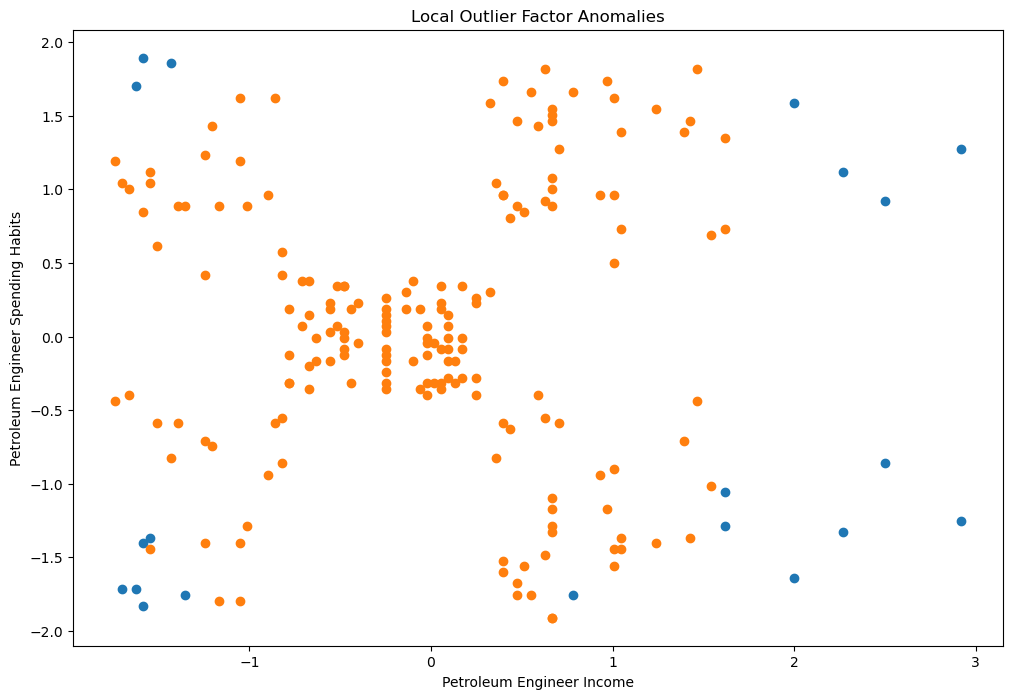

In [6]:
plt.figure(figsize = (12,8))

groups = df_scaled.groupby("Anomaly")

for name, group in groups:
    plt.plot(group['Petroleum_Engineer_Income (K$)'],
             group['Spending_Habits (From 1 to 100)'],
             marker = "o", linestyle = "", label = name)

plt.xlabel('Petroleum Engineer Income')
plt.ylabel('Petroleum Engineer Spending Habits')
plt.title('Local Outlier Factor Anomalies')